<a href="https://colab.research.google.com/github/RafaelNovais/MasterAI/blob/master/Assignment1_DL_23113607.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# Function to load and preprocess dataset
def load_process_data(csv_file):
    data = pd.read_csv(csv_file)
    X = data.iloc[:, :-1].values  # Features
    y = data.iloc[:, -1].values.reshape(-1, 1)  # Target

    # Split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    return X_train, X_val, X_test, y_train, y_val, y_test, scaler

In [3]:
# Initialize parameter
def initialize_weights(n_features):
    weights = np.zeros((n_features, 1))
    bias = 0
    return weights, bias

In [4]:
# Forward and backward propagation
def propagate(X, y, weights, bias):
    m = X.shape[0]

    # Forward propagation
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    loss = binary_cross_entropy(y, y_pred)

    # Backward propagation
    dz = y_pred - y
    dw = np.dot(X.T, dz) / m
    db = np.sum(dz) / m

    return dw, db, loss

# Gradient Descent Optimization
def optimize(X, y, weights, bias, learning_rate, epochs):
    for i in range(epochs):
        dw, db, loss = propagate(X, y, weights, bias)

        # Update weights/bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {loss:.4f}")

    return weights, bias

In [5]:
# Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Prediction
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    return (y_pred > 0.5).astype(int)

In [6]:
# Binary Cross-Entropy Loss
def binary_cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m
    return loss

In [7]:
# Logistic regression model
def logistic_regression(X_train, X_val, X_test, y_train, y_val, y_test, learning_rate=0.01, epochs=1000):
    # Train
    weights, bias = initialize_weights(X_train.shape[1])
    weights, bias = optimize(X_train, y_train, weights, bias, learning_rate, epochs)

    # Validate
    y_val_pred = predict(X_val, weights, bias)
    accuracy = np.mean(y_val_pred == y_val) * 100
    print(f"Validation Accuracy: {accuracy:.2f}%")

    # Test
    y_test_pred = predict(X_test, weights, bias)
    test_accuracy = np.mean(y_test_pred == y_test) * 100
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    return weights, bias

In [8]:
# Function to plot 2D datasets Class Code
def plot_2d_dataset(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', marker='o')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.colorbar(label='Class')
    plt.show()

In [9]:
# Function to plot 3D datasets Class Code
def plot_3d_dataset(X, y, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', edgecolors='k', marker='o')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    ax.set_title(title)
    fig.colorbar(scatter, label='Class')
    plt.show()

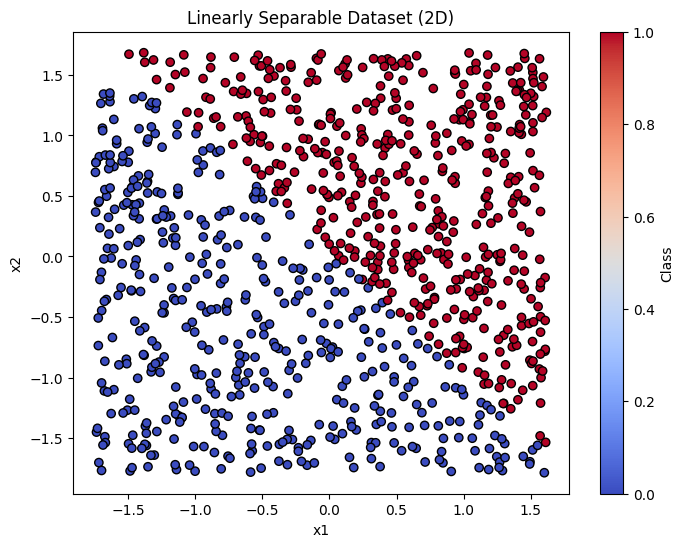

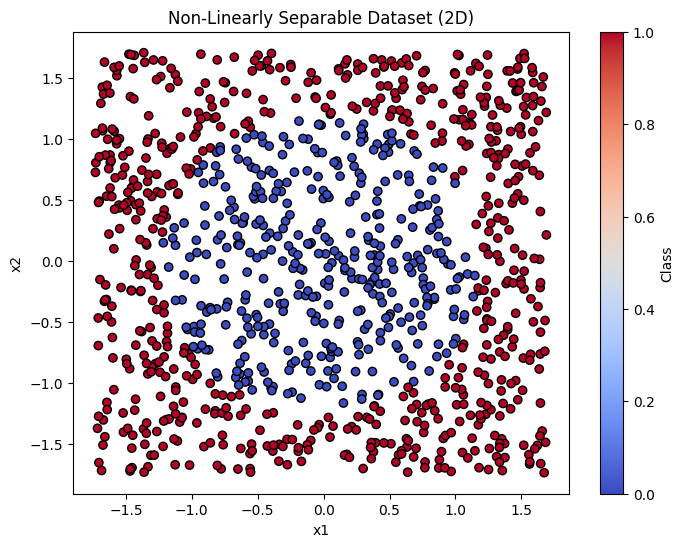

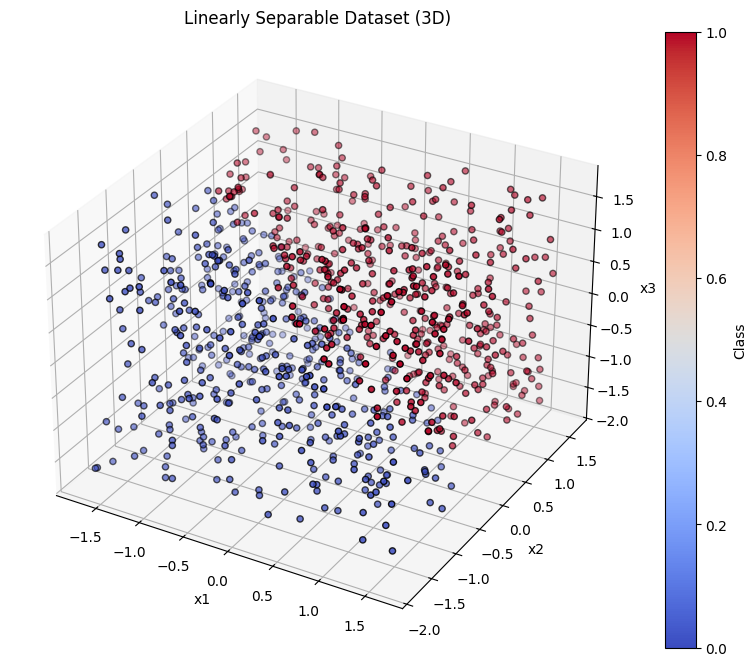

In [16]:
#File Path
linearly_separable_path = "/content/drive/MyDrive/AI/DL/D2_linearly_separable.csv"
non_linearly_separable_path = "/content/drive/MyDrive/AI/DL/D1_non_linearly_separable.csv"
features_3d_path = "/content/drive/MyDrive/AI/DL/D3_3d_features.csv"

dataset_paths = (linearly_separable_path,non_linearly_separable_path,features_3d_path)

# Load datasets
X1_train, X1_val, X1_test, y1_train, y1_val, y1_test, scaler1 = load_process_data(linearly_separable_path)
X2_train, X2_val, X2_test, y2_train, y2_val, y2_test, scaler2 = load_process_data(non_linearly_separable_path)
X3_train, X3_val, X3_test, y3_train, y3_val, y3_test, scaler3 = load_process_data(features_3d_path)

# Plot datasets
plot_2d_dataset(X1_train, y1_train, "Linearly Separable Dataset (2D)")
plot_2d_dataset(X2_train, y2_train, "Non-Linearly Separable Dataset (2D)")
plot_3d_dataset(X3_train, y3_train, "Linearly Separable Dataset (3D)")

In [33]:
# Train Shallow Neural Network
def train_shallow_nn(X_train, y_train, n_hidden, learning_rate, epochs):
    n_input = X_train.shape[1]
    W1, b1, W2, b2 = initialize_parameters(n_input, n_hidden)

    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)
        loss = binary_cross_entropy(y_train, A2)
        dW1, db1, dW2, db2 = backward_propagation(X_train, y_train, Z1, A1, A2, W2)

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {loss:.4f}")

    return W1, b1, W2, b2

In [24]:
# ReLU  function
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

In [18]:
# Initialize parameters for shallow neural network
def initialize_parameters(n_input, n_hidden):
    W1 = np.random.randn(n_hidden, n_input) * 0.01
    b1 = np.zeros((n_hidden, 1))
    W2 = np.random.randn(1, n_hidden) * 0.01
    b2 = np.zeros((1, 1))
    return W1, b1, W2, b2

In [11]:
# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X.T) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

In [21]:
# Backward propagation
def backward_propagation(X, y, Z1, A1, A2, W2):
    m = X.shape[0]
    dZ2 = A2 - y.T
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * relu_derivative(Z1)
    dW1 = np.dot(dZ1, X) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2

In [12]:
# Predict Shallow Neural Network
def predict_shallow_nn(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return (A2 > 0.5).astype(int).T

In [34]:
# shallow neural network dataset
n_hidden = 5
epochs = 1000

for dataset_path in dataset_paths:
    X_train, X_val, X_test, y_train, y_val, y_test, scaler = load_process_data(dataset_path)
    W1, b1, W2, b2 = train_shallow_nn(X_train, y_train, n_hidden, learning_rate, epochs)
    y_val_pred = predict_shallow_nn(X_val, W1, b1, W2, b2)
    accuracy = np.mean(y_val_pred == y_val) * 100
    print(f"Validation Accuracy for {dataset_path}: {accuracy:.2f}%")

Epoch 0: Loss = 643.9337
Epoch 100: Loss = 643.8409
Epoch 200: Loss = 643.7844
Epoch 300: Loss = 643.7502
Epoch 400: Loss = 643.7295
Epoch 500: Loss = 643.7173
Epoch 600: Loss = 643.7105
Epoch 700: Loss = 643.7079
Epoch 800: Loss = 643.7103
Epoch 900: Loss = 643.7231
Validation Accuracy for /content/drive/MyDrive/AI/DL/D2_linearly_separable.csv: 51.76%
Epoch 0: Loss = 727.7970
Epoch 100: Loss = 715.5035
Epoch 200: Loss = 708.0414
Epoch 300: Loss = 703.4985
Epoch 400: Loss = 700.7228
Epoch 500: Loss = 699.0211
Epoch 600: Loss = 697.9744
Epoch 700: Loss = 697.3289
Epoch 800: Loss = 696.9299
Epoch 900: Loss = 696.6829
Validation Accuracy for /content/drive/MyDrive/AI/DL/D1_non_linearly_separable.csv: 64.89%
Epoch 0: Loss = 661.2639
Epoch 100: Loss = 661.1963
Epoch 200: Loss = 661.1555
Epoch 300: Loss = 661.1309
Epoch 400: Loss = 661.1161
Epoch 500: Loss = 661.1073
Epoch 600: Loss = 661.1023
Epoch 700: Loss = 661.0998
Epoch 800: Loss = 661.0996
Epoch 900: Loss = 661.1028
Validation Accurac